<a href="https://colab.research.google.com/github/WinnieAnyoso/KNN_NaiveBayes/blob/master/W9_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###a).Defining the problem.
The problem in this case is predicting whether an email is a spam or not . 


###b). Defining Metrics of success
Now the metrics of success for this project will be:

1. F1 score of above 75% and above will be considered successful
2. Accuracy score of 90% and above will be considered successful


###c).Context 
Spam email, AKA junk email, is an email sent without explicit consent from the recipient. Spam emails usually try to sell questionable goods or are downright deceitful. This is the dark side of email marketing.

### d) Recording the Experimental Design

Below are the steps i took to implement this solution:

1) Business Understanding: This sheds light to the context of the business question that we are trying to answer hence keep the focus during the data analysis so that we meet the intended objective. 

2) Reading the data: Reading our data with and aim to understand the variables and observations. 

3) Checking our data: This to get details about the dataset, the number of records, the statistal summary,the datatypes in our dataset among others.

4) Data cleaning, I performed all my data cleaning and preparation to make my data ready for analysis.

5) EDA, the data was analysed and visualized.

6) Implementing the solution using Naive Bayes Classifier

7) Challenged the solution.


#1.Importing Libraries

In [ ]:

# Import Libraries

import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

# Other libraries
import warnings
warnings.filterwarnings('ignore')

#2.Reading the Data 

In [ ]:
# Let's call our dataframe 'spam'
# 
df = pd.read_csv('spambase_csv.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#3.DataExploration 

In [ ]:
# 3. Data set exploration
df.sample(4)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
3077,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.19,0.00,0.0,0.0,1.19,1.19,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2.38,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.220,0.0,0.0,0.0,0.000,2.000,12,34,0
2502,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,3.33,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,3.33,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.000,1.750,3,14,0
2866,0.0,0.00,0.0,0.0,2.85,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2.85,0.00,0.0,0.0,2.85,0.00,0.0,2.85,0.0,0.0,0.0,0.00,0.00,2.85,0.00,0.0,0.0,0.0,0.0,2.85,0.0,0.0,2.85,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,2.85,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.000,3.800,29,38,0
2291,0.0,0.16,0.0,0.0,0.00,0.0,0.0,0.16,0.16,0.0,0.0,0.0,0.0,0.00,0.16,0.0,0.0,0.00,0.48,0.0,0.16,0.0,0.0,0.0,0.81,0.48,0.16,0.32,0.0,0.0,0.0,0.0,0.00,0.0,3.4,0.00,0.16,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.00,0.32,0.16,0.0,0.0,0.123,0.0,0.0,0.0,0.095,4.438,50,932,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
df.describe().T  # T indicates transpose


,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


In [ ]:
## 

df.shape

(4601, 58)

- Dataset has 4601 rows and 58 columns 

In [ ]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


#4.Data Cleaning

In [ ]:
# checking for null values

df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

- There are no null values in any of the columns 

In [ ]:
# checking for duplicated records

df.duplicated().any()


True

- There are duplicated records

In [ ]:
# checking for the number of duplicate records. 

df.duplicated().sum()

391

- There are 391 duplicated records

In [ ]:
# DROPPING duplicates 
df = df.drop_duplicates(keep = 'first')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# checking the shape of the dataframe to confirm that the duplicates 
# were dropped 
df.shape

(4210, 58)

- 391 records have succesfully been dropped 

In [ ]:
# CARDINALITY TEST 

# checking for the number of unique values in each column
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

#5.EDA

##Univariate Analysis

Text(0.5, 1.0, 'Spam vs Non_Spam Emails')

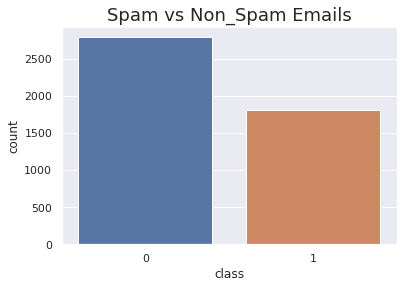

In [ ]:
# Plotting the target variable 

sns.set(style="darkgrid")
ax = sns.countplot(x="class", data=spam)
ax.set_title('Spam vs Non_Spam Emails', fontsize=18)

- There are more non- spam messages than the spam messages 

In [ ]:

# First we will verify whether the features are normally distriibuted or not.

# Using the shapiro test, we will test the for normality on the features of our data
# Use a for loop to iterate through all the columns systematically.

# importing the shapiro function
from scipy.stats import shapiro 

for i in spam.columns:

  stat, p = shapiro(spam[i])             # testing for normality

# interpreting the results
alpha = 0.05
if p > alpha:
    print('Sample is Gaussian')
else:
    print('Sample is not look Gaussian')

Sample does not look Gaussian


#6.Solution Implementation

In [ ]:

# Splitting the data into dependent and independent sets.
X = spam.drop('class', axis = 1)
y = spam['class']

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


###Gauss Naive Bayees

NB: This classifier is best suited for normalized data as it makes the normality assumption. 

In [ ]:
#STEP 1: Normalize the data

norm = Normalizer().fit(X)

In [ ]:

gnb = GaussianNB()  
model = gnb.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred))

# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('The accuracy :',accuracy_score(y_pred,y_test))
print('F1 Score :',f1_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

[[387 144]
 [ 21 369]]
The accuracy : 0.8208469055374593
F1 Score : 0.8172757475083057


The model has an accurcay of 82.08% and an f1 score of 81.72%. 

###Bernoulli Naive Bayes

In [ ]:
# train, test and spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

# Training the model.
# Splitting the data into train and test sets

bnb = BernoulliNB().fit(X_train, y_train)

# Predicting
y_pred2 = bnb.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred2))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred2))
print('The accuracy :',accuracy_score(y_pred2,y_test))
print('F1 Score :',f1_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       559
           1       0.87      0.84      0.85       362

    accuracy                           0.89       921
   macro avg       0.88      0.88      0.88       921
weighted avg       0.89      0.89      0.89       921

[[512  47]
 [ 58 304]]
The accuracy : 0.8859934853420195
F1 Score : 0.8527349228611502


- The bernoulli has a higher accuracy and f1 score as compared to the Gauss Bayes. 
- The accuracy of the model is 88.60% while the f1 score is 85.27%

###Multinomial Naive Bayes 

In [ ]:
# Split the dataset 80,20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Training the model.
# Splitting the data into train and test sets

mnb = MultinomialNB().fit(X_train, y_train)

# Predicting
y_pred1 = mnb.predict(X_test)

# Evaluating the predictions made by the model

# 1. Using Classification report
print(classification_report(y_test, y_pred1))


# 2. Using  the accuracy score
print(confusion_matrix(y_test, y_pred1))
print('The accuracy :',accuracy_score(y_pred1,y_test))
print('F1 Score :',f1_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921

[[445  86]
 [111 279]]
The accuracy : 0.7861020629750272
F1 Score : 0.7390728476821192


- This has the lowest accuracy and f1 scores as compared the the bernoulli and the Gauss with an accuracy of 78.61% and an f1 score of 73%

#7.Challenging the solution

In [ ]:
from sklearn.svm import SVC

# Selecting the independent variables and the target variable
x = spam.drop('class', axis = 1)
y = spam['class']

# models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of models and model names 
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
  # Feature scaling 
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Accuracy of the model
  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  
  return accuracy, f1, model

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, x, y)[0]}and the f1 score is: {predictor(model, x, y)[1]} ')

The accuracy score of Polynomial is: 0.7741585233441911and the f1 score is: 0.6413793103448276 
The accuracy score of Linear     is: 0.9120521172638436and the f1 score is: 0.8924302788844622 
The accuracy score of Rbf        is: 0.9283387622149837and the f1 score is: 0.911764705882353 


- From the findings above it is evident that the rbf model perfomed way better than the linear and polynomial models. 

#8.Conclusions

- We conclude that, the Naive bayes models performed way better with bernuolli and Gauss giving higher accuracies and f1 scores of above 80%.
- All the Naive Bayes models surpassed our metrics of success. 
- When it came to challenging the solution, I went for SVM/C. Now, here, the kernel that performmed better was the Rbf with an accuracy score of 92.83% and an f1 score of 91.18% which was higher as compared to those of the Naive Bayes. 


#9.Recommendations


- When predicting whether an email is a spam email or not, RBf kernel is recommended to deduce more accurate predictions. 
- More data is however needed to ensure more accurate predictions are made. 